In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
data = pd.read_csv("datasets/cars.csv")

In [3]:
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,Toyota
1,31.9,4,89,71,1925,14,1980,Honda
2,17.0,8,302,140,3449,11,1971,Toyota
3,15.0,8,400,150,3761,10,1971,Toyota
4,30.5,4,98,63,2051,17,1978,Toyota


In [4]:
X = data[data.columns[:-1]]
X1 = X.iloc[:,:2]
X2 =  X.iloc[:,3:4]
X3 =  X.iloc[:,5:]
X3.dtypes

 time-to-60    int64
 year          int64
dtype: object

In [5]:
X = pd.concat((X1,X2,X3),axis=1)

In [6]:
X

,mpg,cylinders,hp,time-to-60,year
0,14.0,8,165,12,1972
1,31.9,4,71,14,1980
2,17.0,8,140,11,1971
3,15.0,8,150,10,1971
4,30.5,4,63,17,1978
...,...,...,...,...,...
256,17.0,8,130,15,1980
257,36.1,4,60,16,1979
258,22.0,6,112,15,1983
259,18.0,6,100,16,1972


In [7]:
# Eliminating null values
for i in X.columns:
    X[i] = X[i].fillna(int(X[i].median()))

C:\Users\Kyle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Kyle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Kyle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Kyle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

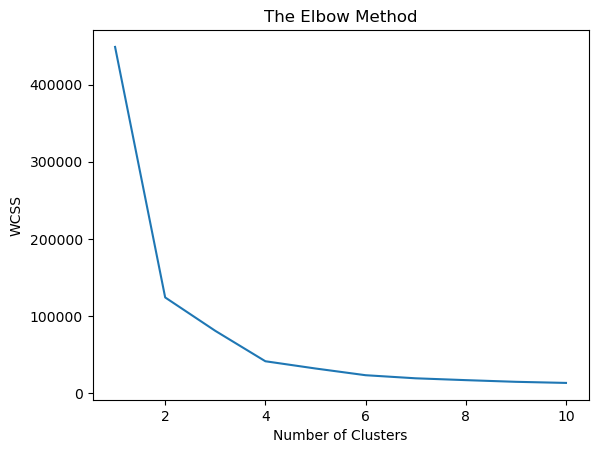

In [11]:
# Getting the elbow plot to determine the number of clusters to use
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++', max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.ylabel('WCSS')
plt.xlabel("Number of Clusters")
plt.title('The Elbow Method')
plt.show()

C:\Users\Kyle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kyle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


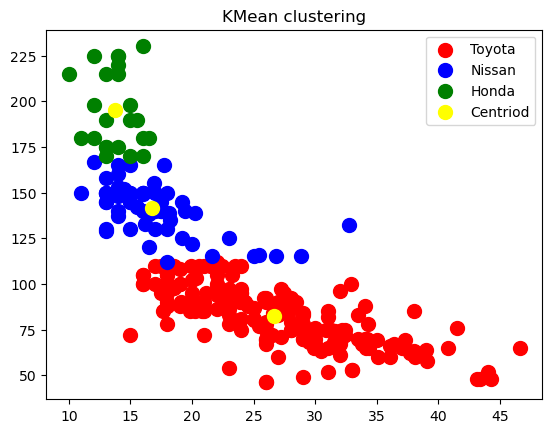

In [10]:
# Applying the solution obtained from elbow method. That's n_clusters =3
kmeans = KMeans(n_clusters=3,max_iter=300,init='k-means++',random_state=0)

y_kmeans = kmeans.fit_predict(X)
X = X.values
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,2],s=100, c = 'red', label='Toyota')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,2],s=100, c = 'blue', label='Nissan')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,2],s=100, c = 'green', label='Honda')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],s=100, c = 'yellow', label='Centriod')
plt.title('KMean clustering')
plt.legend()
plt.show()